In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('data/old_chemblAug5.tar.xz', compression='xz')

In [5]:
data

,smiles,fragsmiles,selfies,tsmiles,fold0,fold1,fold2,fold3,fold4
0,CSc1nn(-c2cccc(C)c2)c2cc(C3=CCNCC3)ccc12,C S <6> c1ccc2[nH]ncc2c1 <4> <1> ( <0> C1=CCNC...,[C] [S] [C] [=N] [N] [Branch1] [N] [C] [=C] [C...,*C&*SC1=NN(*)C2=CC(*)=CC=C12&*C1=CC=CC(*)=C1&*...,train,valid,train,train,train
1,c1ccc(C)cc1-n1c2c(ccc(C3CCNCC=3)c2)c(n1)SC,C <4> c1ccccc1 <0> <4> c1ccc2[nH]ncc2c1 <6> <1...,[C] [=C] [C] [=C] [Branch1] [C] [C] [C] [=C] [...,*C&*SC1=NN(*)C2=CC(*)=CC=C12&*C1=CC(*)=CC=C1&*...,train,valid,train,train,train
2,c1c(-n2nc(c3c2cc(C2=CCNCC2)cc3)SC)cccc1C,C1=CCNCC1 <0> <1> c1ccc2[nH]ncc2c1 <6> <4> ( <...,[C] [=C] [Branch2] [Ring1] [=N] [N] [N] [=C] [...,*C&*SC1=NN(*)C2=C1C=CC(*)=C2&*C1=CC(*)=CC=C1&*...,train,valid,train,train,train
3,N1CC=C(CC1)c1ccc2c(c1)n(-c1cccc(c1)C)nc2SC,C S <6> c1ccc2[nH]ncc2c1 <1> <4> ( <0> c1ccccc...,[N] [C] [C] [=C] [Branch1] [Branch1] [C] [C] [...,*C&*SC1=NN(*)C2=CC(*)=CC=C12&*C1=CC=CC(*)=C1&*...,train,valid,train,train,train
4,c1cc(C)cc(-n2c3c(c(SC)n2)ccc(c3)C2=CCNCC2)c1,C1=CCNCC1 <0> <1> c1ccc2[nH]ncc2c1 <4> <6> ( S...,[C] [=C] [C] [Branch1] [C] [C] [=C] [C] [Branc...,*C&*SC1=NN(*)C2=C1C=CC(*)=C2&*C1=CC=CC(*)=C1&*...,train,valid,train,train,train
...,...,...,...,...,...,...,...,...,...
1352035,O[C@H](COc1ccc2[nH]ncc2c1)CN1CCN(c2ccc(Cl)cc2)CC1,c1ccc2[nH]ncc2c1 <0> O C C|S ( O ) C <2> C1CNC...,[O] [C@H1] [Branch1] [S] [C] [O] [C] [=C] [C] ...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC=C2NN=CC2=C1&*...,train,train,train,valid,train
1352036,n1cc2c(ccc(OC[C@@H](O)CN3CCN(CC3)c3ccc(cc3)Cl)...,Cl <3> c1ccccc1 <0> <5> C1CNCCN1 <2> C C|S ( O...,[N] [=C] [C] [=C] [Branch2] [Ring2] [#Branch1]...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC2=C(C=C1)NN=C2...,train,train,train,valid,train
1352037,C1CN(c2ccc(cc2)Cl)CCN1C[C@@H](COc1ccc2[nH]ncc2...,Cl <3> c1ccccc1 <0> <5> C1CNCCN1 <2> C C|S ( C...,[C] [C] [N] [Branch1] [N] [C] [=C] [C] [=C] [B...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC=C2NN=CC2=C1&*...,train,train,train,valid,train
1352038,C([C@@H](COc1ccc2c(cn[nH]2)c1)O)N1CCN(CC1)c1cc...,O C|S ( C O <0> c1ccc2[nH]ncc2c1 ) C <2> C1CNC...,[C] [Branch2] [Ring1] [#Branch1] [C@@H1] [Bran...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC=C2NN=CC2=C1&*...,train,train,train,valid,train


In [6]:
fr_data = data['fragsmiles']

In [7]:
import re
SMI_REGEX_PATTERN = r"(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\|\/|:|~|@|\?|\*|\$|\%[0-9]{2}|(?<!<)[0-9](?!>)|<[0-9]+[A-Z]*>)|[0-9]+[RS]"
# SMI_REGEX_PATTERN = r"(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|\+|\\\\\/|:|@|\?|>|\*|\$|\%[0–9]{2}|[0–9])"
tokenizer = re.compile(SMI_REGEX_PATTERN)

In [8]:
from src.conversion import GenFragSmiles2Smiles

In [9]:
from chemicalgof import Sequence2String, String2Tokens

In [10]:
fr_data.dropna()

0          C S <6> c1ccc2[nH]ncc2c1 <4> <1> ( <0> C1=CCNC...
1          C <4> c1ccccc1 <0> <4> c1ccc2[nH]ncc2c1 <6> <1...
2          C1=CCNCC1 <0> <1> c1ccc2[nH]ncc2c1 <6> <4> ( <...
3          C S <6> c1ccc2[nH]ncc2c1 <1> <4> ( <0> c1ccccc...
4          C1=CCNCC1 <0> <1> c1ccc2[nH]ncc2c1 <4> <6> ( S...
                                 ...                        
1352035    c1ccc2[nH]ncc2c1 <0> O C C|S ( O ) C <2> C1CNC...
1352036    Cl <3> c1ccccc1 <0> <5> C1CNCCN1 <2> C C|S ( O...
1352037    Cl <3> c1ccccc1 <0> <5> C1CNCCN1 <2> C C|S ( C...
1352038    O C|S ( C O <0> c1ccc2[nH]ncc2c1 ) C <2> C1CNC...
1352039    c1ccc2[nH]ncc2c1 <0> O C C|S ( C <2> C1CNCCN1 ...
Name: fragsmiles, Length: 1187523, dtype: object

In [11]:
fr_data_str = fr_data.dropna().str.split(' ').apply(Sequence2String)

In [12]:
atom_fragsmiles = fr_data_str.apply(tokenizer.findall).apply(' '.join)

<Axes: >

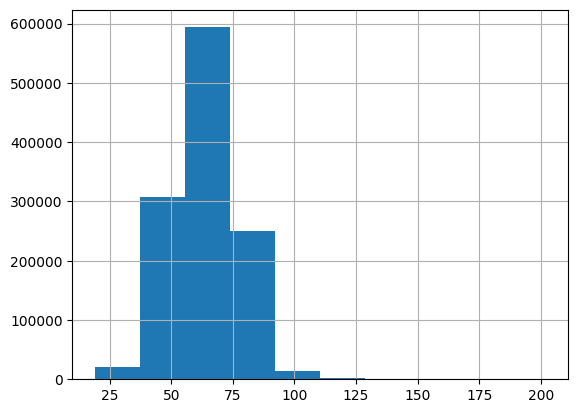

In [20]:
atom_fragsmiles.str.split(' ').apply(len).hist()

In [13]:
atom_fragsmiles.name = 'atom_fragsmiles'

In [14]:
atom_fragsmiles

0          C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <4> ....
1          C . <4> c 1 c c c c c 1 <0> . <4> c 1 c c c 2 ...
2          C 1 = C C N C C 1 <0> . <1> c 1 c c c 2 [nH] n...
3          C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <1> ....
4          C 1 = C C N C C 1 <0> . <1> c 1 c c c 2 [nH] n...
                                 ...                        
1352035    c 1 c c c 2 [nH] n c c 2 c 1 <0> . O . C . C S...
1352036    Cl . <3> c 1 c c c c c 1 <0> . <5> C 1 C N C C...
1352037    Cl . <3> c 1 c c c c c 1 <0> . <5> C 1 C N C C...
1352038    O . C S . ( C . O . <0> c 1 c c c 2 [nH] n c c...
1352039    c 1 c c c 2 [nH] n c c 2 c 1 <0> . O . C . C S...
Name: atom_fragsmiles, Length: 1187523, dtype: object

In [15]:
data = pd.concat([data, atom_fragsmiles], axis=1, ignore_index=False)

In [16]:
data

,smiles,fragsmiles,selfies,tsmiles,fold0,fold1,fold2,fold3,fold4,atom_fragsmiles
0,CSc1nn(-c2cccc(C)c2)c2cc(C3=CCNCC3)ccc12,C S <6> c1ccc2[nH]ncc2c1 <4> <1> ( <0> C1=CCNC...,[C] [S] [C] [=N] [N] [Branch1] [N] [C] [=C] [C...,*C&*SC1=NN(*)C2=CC(*)=CC=C12&*C1=CC=CC(*)=C1&*...,train,valid,train,train,train,C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <4> ....
1,c1ccc(C)cc1-n1c2c(ccc(C3CCNCC=3)c2)c(n1)SC,C <4> c1ccccc1 <0> <4> c1ccc2[nH]ncc2c1 <6> <1...,[C] [=C] [C] [=C] [Branch1] [C] [C] [C] [=C] [...,*C&*SC1=NN(*)C2=CC(*)=CC=C12&*C1=CC(*)=CC=C1&*...,train,valid,train,train,train,C . <4> c 1 c c c c c 1 <0> . <4> c 1 c c c 2 ...
2,c1c(-n2nc(c3c2cc(C2=CCNCC2)cc3)SC)cccc1C,C1=CCNCC1 <0> <1> c1ccc2[nH]ncc2c1 <6> <4> ( <...,[C] [=C] [Branch2] [Ring1] [=N] [N] [N] [=C] [...,*C&*SC1=NN(*)C2=C1C=CC(*)=C2&*C1=CC(*)=CC=C1&*...,train,valid,train,train,train,C 1 = C C N C C 1 <0> . <1> c 1 c c c 2 [nH] n...
3,N1CC=C(CC1)c1ccc2c(c1)n(-c1cccc(c1)C)nc2SC,C S <6> c1ccc2[nH]ncc2c1 <1> <4> ( <0> c1ccccc...,[N] [C] [C] [=C] [Branch1] [Branch1] [C] [C] [...,*C&*SC1=NN(*)C2=CC(*)=CC=C12&*C1=CC=CC(*)=C1&*...,train,valid,train,train,train,C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <1> ....
4,c1cc(C)cc(-n2c3c(c(SC)n2)ccc(c3)C2=CCNCC2)c1,C1=CCNCC1 <0> <1> c1ccc2[nH]ncc2c1 <4> <6> ( S...,[C] [=C] [C] [Branch1] [C] [C] [=C] [C] [Branc...,*C&*SC1=NN(*)C2=C1C=CC(*)=C2&*C1=CC=CC(*)=C1&*...,train,valid,train,train,train,C 1 = C C N C C 1 <0> . <1> c 1 c c c 2 [nH] n...
...,...,...,...,...,...,...,...,...,...,...
1352035,O[C@H](COc1ccc2[nH]ncc2c1)CN1CCN(c2ccc(Cl)cc2)CC1,c1ccc2[nH]ncc2c1 <0> O C C|S ( O ) C <2> C1CNC...,[O] [C@H1] [Branch1] [S] [C] [O] [C] [=C] [C] ...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC=C2NN=CC2=C1&*...,train,train,train,valid,train,c 1 c c c 2 [nH] n c c 2 c 1 <0> . O . C . C S...
1352036,n1cc2c(ccc(OC[C@@H](O)CN3CCN(CC3)c3ccc(cc3)Cl)...,Cl <3> c1ccccc1 <0> <5> C1CNCCN1 <2> C C|S ( O...,[N] [=C] [C] [=C] [Branch2] [Ring2] [#Branch1]...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC2=C(C=C1)NN=C2...,train,train,train,valid,train,Cl . <3> c 1 c c c c c 1 <0> . <5> C 1 C N C C...
1352037,C1CN(c2ccc(cc2)Cl)CCN1C[C@@H](COc1ccc2[nH]ncc2...,Cl <3> c1ccccc1 <0> <5> C1CNCCN1 <2> C C|S ( C...,[C] [C] [N] [Branch1] [N] [C] [=C] [C] [=C] [B...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC=C2NN=CC2=C1&*...,train,train,train,valid,train,Cl . <3> c 1 c c c c c 1 <0> . <5> C 1 C N C C...
1352038,C([C@@H](COc1ccc2c(cn[nH]2)c1)O)N1CCN(CC1)c1cc...,O C|S ( C O <0> c1ccc2[nH]ncc2c1 ) C <2> C1CNC...,[C] [Branch2] [Ring1] [#Branch1] [C@@H1] [Bran...,*O&*[C@H](*)*&*C*&*O*^*C*^*C1=CC=C2NN=CC2=C1&*...,train,train,train,valid,train,O . C S . ( C . O . <0> c 1 c c c 2 [nH] n c c...


In [17]:
data.to_csv('data/chemblAug5.tar.xz',compression='xz', index=False)

In [1]:
from src.utils import load_data_from_path

In [2]:
load_data_from_path('data/chembl.tar.xz','atom_fragsmiles',0)

0         C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <4> ....
1         C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <4> ....
2         C . S . <6> c 1 c c c 2 [nH] n c c 2 c 1 <4> ....
3         Cl . <0> c 1 c c c 2 c ( c 1 ) C C N 2 <8> . C...
4         C . <5> O = c 1 [nH] c 2 c c c c c 2 c 2 [nH] ...
                                ...                        
270403    O . C . <4S> C 1 C C N C 1 <3> . C . <5> c 1 c...
270404    C 1 C C N C 1 <3> . C . <5> c 1 c c c 2 [nH] c...
270405    c 1 c n c n c 1 <0> . <8> C 1 = N C 2 ( C C S ...
270406    Cl . <3> c 1 c c c c c 1 <0> . <5> C 1 C N C C...
270407    c 1 c c c 2 [nH] n c c 2 c 1 <0> . O . C . C S...
Name: atom_fragsmiles, Length: 270408, dtype: object